<div style = "display: fill;
              border-radius: 50px;
              background-color: #8d42f5;">
    <h1 style = "padding: 15px; 
                 color: White;
                 text-align:center;
                 font-family: Lucida Console;">Email Spam Detection</h1>
</div>


<div style="width:100%;text-align: center;">
    <img src="https://fluentcrm.com/wp-content/uploads/2020/12/Custom-dimensions-1910x1080-px-5-1.png" alt="Email spam" style="height:350px;margin-top:3rem;">
</div>

* **What is Email spam messages?**
    * **Unsolicited Messages:** Email spam consists of unsolicited messages sent to a large number of recipients without their prior consent. These messages flood inboxes without the recipients having expressed interest in receiving them.
    * **Commercial Promotion:** Spam emails are often used for commercial purposes, promoting products, services, or websites. They aim to advertise or market offerings to a broad audience, potentially generating sales or traffic.
    * **Fraudulent and Malicious Intent:** While many spam emails are primarily annoying, some have fraudulent or malicious intent. These may include phishing attempts to steal personal information, distributing malware through attachments or links, or attempting various scams.
    * **High Volume:** Spammers send out emails in high volumes, often using automated tools or botnets to reach as many people as possible. The sheer quantity of spam can overload email servers and clutter inboxes.
    * **Countermeasures:** To combat email spam, email service providers use spam filters and algorithms to detect and filter out spam messages. Users can also mark emails as spam, helping train these filters. Additionally, legal regulations, such as the CAN-SPAM Act in the United States, aim to reduce the prevalence of spam by imposing rules on commercial email communications.
<hr>
    
* **Who send these Email spam messages?**
    * **Marketing Companies:** Some legitimate marketing companies send out promotional emails in large quantities to reach potential customers. While not all marketing emails are spam, those sent without proper consent or that disregard opt-out requests can be considered spam.
    * **Scammers:** Individuals or groups with malicious intent send spam emails to deceive recipients. This includes phishing scams aimed at stealing personal information or financial details, such as login credentials or credit card numbers.
    * **Affiliate Marketers:** Some individuals engage in affiliate marketing, where they promote products or services and earn a commission for each sale generated through their marketing efforts. Some of these marketers resort to spamming to reach a wider audience.
    * **Botnets:** Criminals may hijack networks of infected computers, known as botnets, to send spam. These botnets can churn out vast quantities of spam emails, making it difficult to trace the source.
    * **Fraudsters:** Some spam emails are sent by fraudsters who aim to trick recipients into various schemes, such as advance-fee fraud, lottery scams, or fraudulent investment opportunities.
<hr>

* **what are the consequences faced by the people who get trapped into email spam messages?**
    * **Identity Theft and Fraud:** Some spam emails are phishing attempts designed to trick recipients into revealing sensitive personal information, such as usernames, passwords, credit card numbers, or Social Security numbers. Falling victim to such scams can lead to identity theft, financial loss, and fraud.
    * **Malware Infections:** Spam emails may contain malicious attachments or links that, when clicked, can install malware on the recipient's computer or device. Malware can compromise data, damage systems, and steal information.
    * **Financial Loss:** Spam emails advertising fraudulent products or investment schemes can lead individuals to make financial decisions that result in significant losses. Scammers often promise quick profits or exclusive deals to entice recipients.
    * **Privacy Invasion:** Opening spam emails may lead to privacy invasion, as some spammers track email opens and collect information about recipients. This information can be used for targeted advertising or further spamming.
    * **Overwhelmed Inbox:** Email spam can flood an individual's inbox, making it challenging to find and respond to legitimate emails. This can lead to missed important communications, productivity loss, and frustration.

<div style = "display: fill;
              border-radius: 50px;
              background-color: #40E0D0;">
    <h1 style = "padding: 15px; 
                 color: White;
                 text-align:left;
                 font-family: Lucida Console;">
        1. Importing Essential library and Reading the file
    </h1>
</div>


In [27]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [3]:
df = pd.read_csv('spam.csv',encoding ='latin-1')

In [4]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


<div style = "display: fill;
              border-radius: 50px;
              background-color: skyblue;">
    <h2 style = "padding: 15px; 
                 color: White;
                 text-align:left;
                 font-family: Lucida Console;">
        1.1.Preprocessing
    </h2>
</div>


In [5]:
del df['Unnamed: 2']
del df['Unnamed: 3']
del df['Unnamed: 4']

<div style = "display: fill;
              border-radius: 50px;
              background-color: skyblue;">
    <h3 style = "padding: 15px; 
                 color: White;
                 text-align:left;
                 font-family: Lucida Console;">
        1.2 Renaming the columns
    </h3>
</div>


In [6]:
df.columns = ['spam','message']

<div style = "display: fill;
              border-radius: 50px;
              background-color: #40E0D0;">
    <h2 style = "padding: 15px; 
                 color: White;
                 text-align:left;
                 font-family: Lucida Console;">
        2. Exploratory Data Analysis
    </h2>
</div>
<div style = "display: fill;
              border-radius: 50px;
              background-color: skyblue;">
    <h3 style = "padding: 15px; 
                 color: White;
                 text-align:left;
                 font-family: Lucida Console;">
        2.1 collecting basic information about the dataset
    </h3>
</div>


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   spam     5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


<div style = "display: fill;
              border-radius: 50px;
              background-color: skyblue;">
    <h3 style = "padding: 15px; 
                 color: White;
                 text-align:left;
                 font-family: Lucida Console;">
        2.2 Mathematical orientation of the dataset 
    </h3>
</div>


In [8]:
df.describe()

,spam,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


<div style = "display: fill;
              border-radius: 50px;
              background-color: skyblue;">
    <h3 style = "padding: 15px; 
                 color: White;
                 text-align:left;
                 font-family: Lucida Console;">
        2.3 checking the null values 
    </h3>
</div>


In [9]:
df.isnull().sum()

spam       0
message    0
dtype: int64

<div style = "display: fill;
              border-radius: 50px;
              background-color: skyblue;">
    <h3 style = "padding: 15px; 
                 color: White;
                 text-align:left;
                 font-family: Lucida Console;">
        2.4 Checking the duplicates 
    </h3>
</div>


In [10]:
df.duplicated().sum()

403

<div style = "display: fill;
              border-radius: 50px;
              background-color: skyblue;">
    <h3 style = "padding: 15px; 
                 color: White;
                 text-align:left;
                 font-family: Lucida Console;">
        2.5 Dropping the duplicates
    </h3>
</div>

In [11]:
df = df.drop_duplicates()

<div style = "display: fill;
              border-radius: 50px;
              background-color: #40E0D0;">
    <h2 style = "padding: 15px; 
                 color: White;
                 text-align:left;
                 font-family: Lucida Console;">
        3. Data Visualization
    </h2>
</div>

<div style = "display: fill;
              border-radius: 50px;
              background-color: skyblue;">
    <h3 style = "padding: 15px; 
                 color: White;
                 text-align:left;
                 font-family: Lucida Console;">
        3.1. Percentage of spam to ham messages
    </h3>
</div>


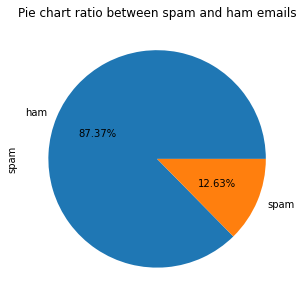

In [12]:
df['spam'].value_counts().plot(kind = 'pie',autopct ='%0.2f%%',figsize = (5,5),title = 'Pie chart ratio between spam and ham emails')
plt.show()

<div style = "display: fill;
              border-radius: 50px;
              background-color: skyblue;">
    <h3 style = "padding: 15px; 
                 color: White;
                 text-align:left;
                 font-family: Lucida Console;">
        3.2. Bar graph of unique words present 
    </h3>
</div>


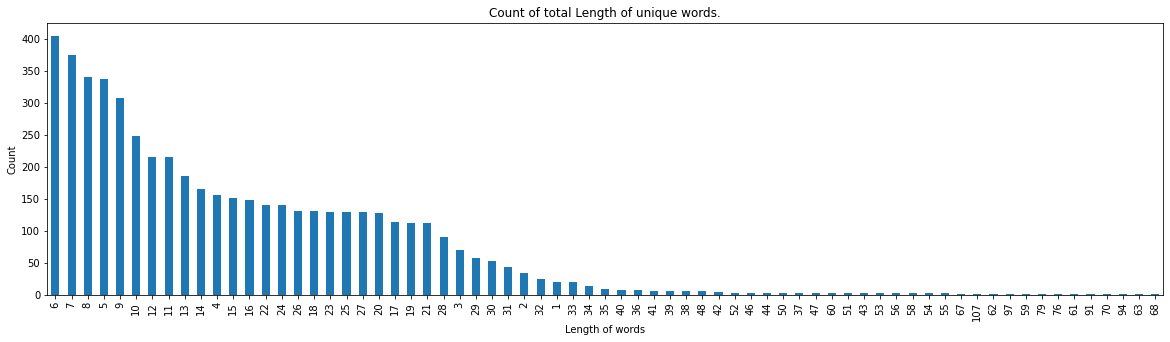

In [13]:
df['message'].apply(lambda x : len(list(set(x.split(' '))))).value_counts().plot(kind = 'bar',figsize = (20,5),title = 'Count of total Length of unique words.')
plt.xlabel('Length of words')
plt.ylabel('Count')
plt.show()

<div style = "display: fill;
              border-radius: 50px;
              background-color: #40E0D0;">
    <h2 style = "padding: 15px; 
                 color: White;
                 text-align:left;
                 font-family: Lucida Console;">
        4. Model Selection 
    </h2>
</div>

<div style = "display: fill;
              border-radius: 50px;
              background-color: skyblue;">
    <h3 style = "padding: 15px; 
                 color: White;
                 text-align:left;
                 font-family: Lucida Console;">
        4.1. Spliting the dataset into Training and testing 
    </h3>
</div>

In [14]:
X = df.drop('spam',axis = 1) 
y = df['spam']

In [15]:
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

<div style = "display: fill;
              border-radius: 50px;
              background-color: skyblue;">
    <h3 style = "padding: 15px; 
                 color: White;
                 text-align:left;
                 font-family: Lucida Console;">
        4.2. Label Encoding the output column or the spam column
    </h3>
</div>


In [16]:
le = LabelEncoder()

In [17]:
y_train = le.fit_transform(y_train)
y_test  = le.fit_transform(y_test)

<div style = "display: fill;
              border-radius: 50px;
              background-color: #40E0D0;">
    <h2 style = "padding: 15px; 
                 color: White;
                 text-align:left;
                 font-family: Lucida Console;">
        5. Model Preprocesing 
    </h2>
</div>
<div style = "display: fill;
              border-radius: 50px;
              background-color: skyblue;">
    <h3 style = "padding: 15px; 
                 color: White;
                 text-align:left;
                 font-family: Lucida Console;">
        5.1. Transforming text to vector based on frequency of each occuring text/words
    </h3>
</div>

In [18]:
# Create a CountVectorizer instance
vect = CountVectorizer()           # transforms given text into a vector on the basis of the frequency (count)

In [19]:
# Fit and transform the training data (X_train)
X_train_vect = vect.fit_transform(X_train['message'])

# Transform the test data (X_test)
X_test_vect = vect.transform(X_test['message'])

<div style = "display: fill;
              border-radius: 50px;
              background-color: #40E0D0;">
    <h2 style = "padding: 15px; 
                 color: White;
                 text-align:left;
                 font-family: Lucida Console;">
        6. Model Training
    </h2>
</div>
<div style = "display: fill;
              border-radius: 50px;
              background-color: skyblue;">
    <h3 style = "padding: 15px; 
                 color: White;
                 text-align:left;
                 font-family: Lucida Console;">
        6.1. Decision Tree
    </h3>
</div>



In [20]:
# Train the Decision Tree Classifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train_vect, y_train)

DecisionTreeClassifier()

In [21]:
# Make predictions on the test data
y_pred_dt = classifier.predict(X_test_vect)

</div>
<div style = "display: fill;
              border-radius: 50px;
              background-color: skyblue;">
    <h3 style = "padding: 15px; 
                 color: White;
                 text-align:left;
                 font-family: Lucida Console;">
        6.2. Multinomial Naive bayes 
    </h3>
</div>


In [22]:
# Train the Multinomial Naive Bayes classifier
classifier = MultinomialNB()
classifier.fit(X_train_vect, y_train)

MultinomialNB()

In [23]:
# Make predictions on the test data
y_pred_nb = classifier.predict(X_test_vect)

</div>
<div style = "display: fill;
              border-radius: 50px;
              background-color: #40E0D0;">
    <h2 style = "padding: 15px; 
                 color: White;
                 text-align:left;
                 font-family: Lucida Console;">
        7. Model Testing
    </h2>
</div>
</div>
<div style = "display: fill;
              border-radius: 50px;
              background-color: skyblue;">
    <h3 style = "padding: 15px; 
                 color: White;
                 text-align:left;
                 font-family: Lucida Console;">
        7.1. Decision Tree Classification report
    </h3>
</div>



In [24]:
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       889
           1       0.89      0.86      0.87       145

    accuracy                           0.97      1034
   macro avg       0.93      0.92      0.93      1034
weighted avg       0.96      0.97      0.96      1034



<AxesSubplot:>

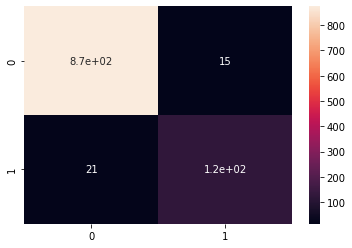

In [28]:
sns.heatmap(confusion_matrix(y_test,y_pred_dt),annot=True)

In [29]:
print('Mean Absolute Error     : ',mean_absolute_error(y_test,y_pred_dt))
print('Mean Squared Error      : ',mean_squared_error(y_test,y_pred_dt))
print('Root Mean Squared Error : ',np.sqrt(mean_squared_error(y_test,y_pred_dt)))

Mean Absolute Error     :  0.03481624758220503
Mean Squared Error      :  0.03481624758220503
Root Mean Squared Error :  0.18659112407133688


In [30]:
# Note 
# Decision Tree Model is more error prone as well as the model overfits so checking different model would be much better

<div style = "display: fill;
              border-radius: 50px;
              background-color: skyblue;">
    <h3 style = "padding: 15px; 
                 color: White;
                 text-align:left;
                 font-family: Lucida Console;">
        7.2. Multinomial Naive bayes Classification report
    </h3>
</div>

In [31]:
print(classification_report(y_test, y_pred_nb))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       889
           1       0.99      0.91      0.95       145

    accuracy                           0.99      1034
   macro avg       0.99      0.95      0.97      1034
weighted avg       0.99      0.99      0.99      1034



<AxesSubplot:>

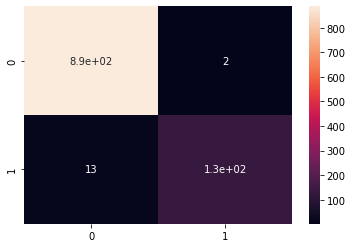

In [32]:
sns.heatmap(confusion_matrix(y_test,y_pred_nb),annot=True)

In [33]:
print('Mean Absolute Error     : ',mean_absolute_error(y_test,y_pred_nb))
print('Mean Squared Error      : ',mean_squared_error(y_test,y_pred_nb))
print('Root Mean Squared Error : ',np.sqrt(mean_squared_error(y_test,y_pred_nb)))

Mean Absolute Error     :  0.014506769825918761
Mean Squared Error      :  0.014506769825918761
Root Mean Squared Error :  0.12044405267973492


In [ ]:
# on Comparing 2 Model multinomial naive bayes outperformed decision trees by 4 percent Hence Multinomial Naive bayes
# is the best algorithm to be used over here 